## Clustering Analysis - Used Cars

We'll start by importing the necessay datasets.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

### Problem Definition

We will need to cluster the used car prices based on the Make, year, mileage, etc. 

https://www.kaggle.com/jpayne/852k-used-car-listings#true_car_listings.csv

### Load the Data

In [2]:
df = pd.read_csv('/home/bda/Desktop/1260/true_car_listings.csv')
print(df.columns)
df.head()

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


### Feature Engineering 

In [3]:
#select the columns
X_columns = ['Year', 'Mileage']

# normalize the data
for col in X_columns:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

/home/bda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Model Training

In [4]:
df[X_columns].shape

(852122, 2)

In [5]:
df_sample = df.sample(5000).copy()

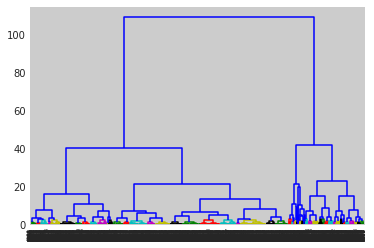

{1, 2}
Counter({1: 3862, 2: 1138})


In [8]:
k = 2
color_threshold = 3.0
d = sch.distance.pdist(df_sample[X_columns])
Z= sch.linkage(d, method = 'ward') # minimize within cluster variation
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()

print(set(T))
print(collections.Counter(T))

df_results = df_sample.copy()
df_results['cluster'] = T
df_sample['cluster'] = T

In [9]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['Price'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['Price'])))

1 3862
[6450, 7285, 7446, 7498, 7600, 7699, 7715, 7958, 7988, 7993, 7995, 7995, 7995, 7995, 7999, 8490, 8491, 8495, 8495, 8500, 8712, 8770, 8799, 8900, 8900, 8911, 8950, 8950, 8961, 8970, 8988, 8991, 8995, 8995, 8995, 8995, 8997, 8997, 8999, 8999, 8999, 8999, 9000, 9133, 9136, 9205, 9299, 9336, 9337, 9342, 9400, 9462, 9488, 9495, 9498, 9498, 9500, 9500, 9500, 9600, 9600, 9651, 9657, 9680, 9688, 9695, 9771, 9795, 9798, 9800, 9800, 9824, 9833, 9868, 9871, 9888, 9888, 9890, 9900, 9900, 9950, 9977, 9977, 9982, 9985, 9990, 9990, 9991, 9992, 9994, 9995, 9995, 9995, 9995, 9995, 9995, 9995, 9995, 9995, 9998, 9998, 9999, 9999, 9999, 9999, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10055, 10063, 10108, 10118, 10195, 10200, 10299, 10300, 10377, 10399, 10439, 10441, 10480, 10484, 10488, 10492, 10495, 10495, 10495, 10499, 10500, 10502, 10513, 10576, 10593, 10598, 10599, 10620, 10623, 10650, 10695, 10700, 10700, 10700, 10731, 10795, 10881, 10888, 10891, 10899, 10899, 10900, 10901, 10937, 10950,

In [10]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,1,2
Price,24277.05,12596.45
Year,0.44,-1.47
Mileage,-0.41,1.37


Year


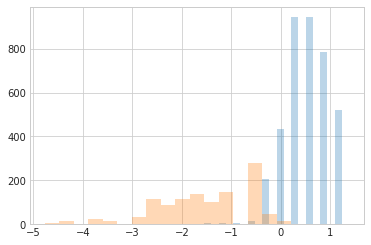

Mileage


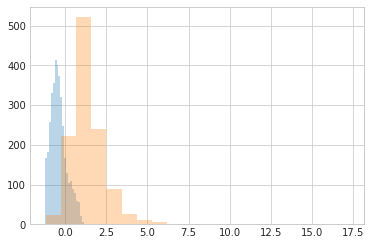

In [11]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(T):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    #plt.legend()
    plt.show()

2
Year


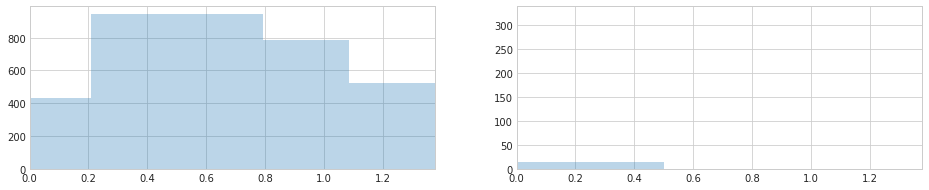

Mileage


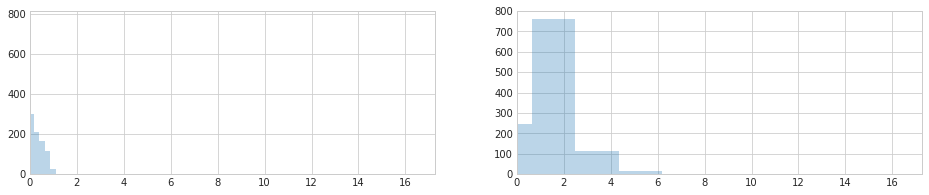

In [12]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=10)
        i += 1
    plt.show()

Year


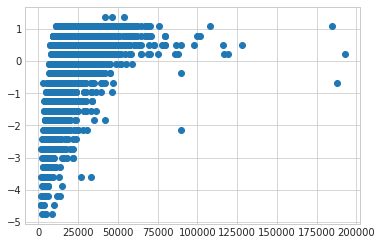

Mileage


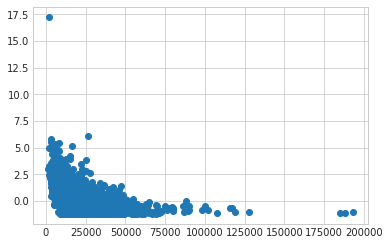

In [13]:
# Analyze the correlation with Happiness Score
for c in ['Year', 'Mileage']:
    print(c)
    plt.plot(df_results['Price'], df_results[c], 'o')
    plt.show()

## Model Evaluation

In [14]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(T)):
    centroids.append(df_sample[df_sample['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(T)):
    df_filter = df_sample[df_sample['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(T)):
    df_filter = df_sample[df_sample['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.9557074523895683
Intra Cluster distance 0.43582357059319504
Inertia 3954.919670725518


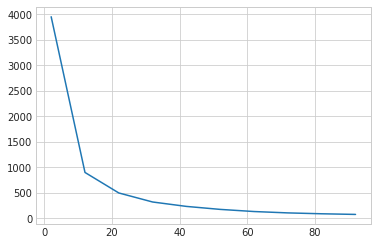

In [17]:
inertia = []
number_k = []
for k in range(2,100,10):
    d = sch.distance.pdist(df_sample[X_columns])
    Z= sch.linkage(d, method = 'ward')
    T = sch.fcluster(Z, k, 'maxclust')
    df_sample['cluster'] = T

    # Inertia
    distances = []
    for cluster in sorted(set(T)):
        df_filter = df_sample[df_sample['cluster']==cluster]
        centroid = df_filter[X_columns].mean().values
        for _, v in df_filter[X_columns].iterrows():
            distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
    inertia.append(np.sum(distances))
    number_k.append(k)
plt.plot(number_k, inertia)
plt.show()